Titanic gemisinde kimin hayatta kaldığını tahmin edeceğiz.

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
dizi = pd.read_csv('train.csv', header = 0)
dizi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [92]:
dizi.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Analize tabi tutulmayacak olan verileri çıkartıyoruz.

In [93]:
dizi = dizi.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)

In [94]:
dizi.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [95]:
print ('Kadın yolcu sayısı: ', len(dizi.groupby('Sex').groups['female']))
print ('Erkek yolcu sayısı: ', len(dizi.groupby('Sex').groups['male']))

Kadın yolcu sayısı:  314
Erkek yolcu sayısı:  577


Kadın ve erkek yolcuları ayrı ayrı analiz etmek için ayrım yapıyoruz.

In [96]:
kadinYolcular = dizi[dizi['Sex']== 'female']
erkekYolcular = dizi[dizi['Sex']== 'male']

Erkek ve kadınların haricinde, yaşlarını 18 altı olarak kabul ettiğim çocuk yolcu veri çerçevesini oluşturulmuştur.

In [97]:
cocukYolcular = dizi[dizi['Age'] < 18]

In [98]:
kizCocukYolcular = cocukYolcular[cocukYolcular['Sex'] == 'female']
erkekCocukYolcular = cocukYolcular[cocukYolcular['Sex'] == 'male']

In [99]:
yetiskinKadinYolcular = kadinYolcular.drop(kizCocukYolcular.index[:])
yetiskinErkekYolcular = erkekYolcular.drop(erkekCocukYolcular.index[:])

In [100]:
print ('Tüm yolcular: ', len(dizi))
print ('Kadın yolcular:', len(kadinYolcular))
print ('Yetişkin kadın yolcular:', len(yetiskinKadinYolcular))
print ('Erkek yolcular:', len(erkekYolcular))
print ('Yetişkin kadın yolcular:', len(yetiskinErkekYolcular))
print ('Çocuk yolcular:', len(cocukYolcular))
print ('Kız çocuk yolcular:', len(kizCocukYolcular))
print ('Erkek çocuk yolcular:', len(erkekCocukYolcular))

Tüm yolcular:  891
Kadın yolcular: 314
Yetişkin kadın yolcular: 259
Erkek yolcular: 577
Yetişkin kadın yolcular: 519
Çocuk yolcular: 113
Kız çocuk yolcular: 55
Erkek çocuk yolcular: 58


Cinsiyete göre yolcuların dağılımı ve yuvarlak diyagram ile bu dağılımın görselleştirilmesi yapılmıştır.

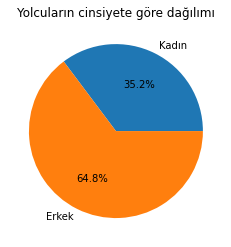

In [101]:
x = [len(kadinYolcular), len(erkekYolcular)]
label = ['Kadın', 'Erkek']
plt.pie(x, labels = label, autopct = '%1.01f%%')
plt.title('Yolcuların cinsiyete göre dağılımı')
plt.show()

Alternatif bir yaş dağılımı bulgusunun elde edilmesi gösterilmiştir. 
Yeni bir fonksiyon tanımlanarak .apply() uygulamasıyla elde edilen farklı yaş gruplarına göre dağılım elde edilmiştir. 
Tanımlanan fonksiyona göre 0-18 yaş aralığı (çocuk), 
18-24 yaş aralığı (genç), 
24 yaş üstü (Yetişkin) olarak adlandırılmıştır. 
.value_counts() fonksiyonu ile bu yaş aralıklarındaki yolcu sayıları elde edilmiştir.

In [102]:
def yas_Dagilimi(x):
    if x>=0 and x <18:
        return 'Çocuk'
    elif x>=16 and x<=24:
        return 'Genç'
    else:
        return 'Yetişkin'
    
dizi['Age'].apply(yas_Dagilimi).value_counts()

Yetişkin    614
Genç        164
Çocuk       113
Name: Age, dtype: int64

Farklı yaş aralıklarına göre yolcuların dağılımı gösterilmiştir. Yuvarlak diyagram ile verinin görselleştirilmiştir.

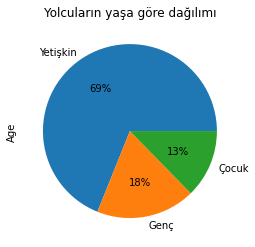

In [103]:
dizi['Age'].apply(yas_Dagilimi).value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Yolcuların yaşa göre dağılımı')
plt.show()

In [104]:
print ('Yetişkin kadın yolcuların yaş ortalaması:', yetiskinKadinYolcular['Age'].mean())
print ('Yetişkin erkek yolcuların yaş ortalaması:', yetiskinErkekYolcular['Age'].mean())
print ('Çocuk yolcuların yaş ortalaması:', cocukYolcular['Age'].mean())

Yetişkin kadın yolcuların yaş ortalaması: 32.90291262135922
Yetişkin erkek yolcuların yaş ortalaması: 33.937974683544304
Çocuk yolcuların yaş ortalaması: 9.041327433628318


Yolcuların ekonomik göstergesi

In [105]:
dizi['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Yolcu sınıflarına göre yolcu sayılarının dağılımı yatay çubuk grafik ile görselleştirilmiştir.

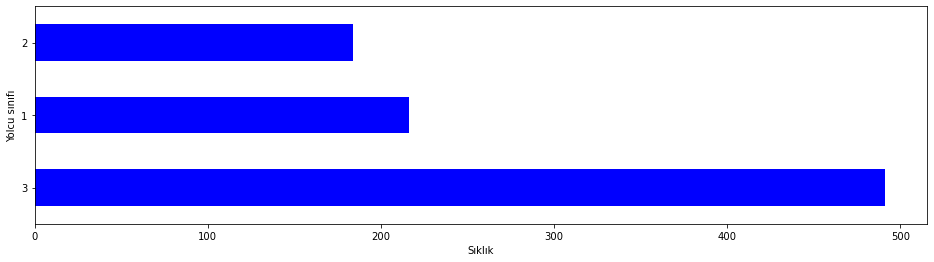

In [106]:
dizi['Pclass'].value_counts().plot(kind='barh', color='blue', figsize=[16,4])
plt.xlabel('Sıklık')
plt.ylabel('Yolcu sınıfı')
plt.show()

Bu çalışmanın içeriğinde herhangi bir analize tabi tutulmasa da her ayrı yolcu sınıfı için veri çerçeveleri oluşturulmuştur.

In [107]:
birinciSinifYolcular = dizi[dizi['Pclass'] == 1]
ikinciSinifYolcular  = dizi[dizi['Pclass'] == 2]
ucuncuSinifYolcular  = dizi[dizi['Pclass'] == 3]

Yolcuların gemiye biniş limanı bilgisini içeren ‘Embarked’ değişkeninin değerleri .describe() fonksiyonu ile tanımlanmıştır. 
Sonuca göre; yolcular 3 ayrı limandan gemiye binmişler. 
En fazla yolcunun-(644 yolcunun) biniş yaptığı liman ‘S’ ile tanımlanan Southampton limanı olmuştur. 
891 yolcudan ikisinin biniş bilgisi yoktur.

In [108]:
dizi['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

‘Embarked’ sütununda eksik iki hücre, sütunda en fazla değer olan ‘S’ ile doldurulmuştur.

In [109]:
dizi['Embarked'] = dizi['Embarked'].fillna('S')

Yolcuların gemiye biniş limanlarına göre dağılımları çubuk grafik ile görselleştirilmiştir.

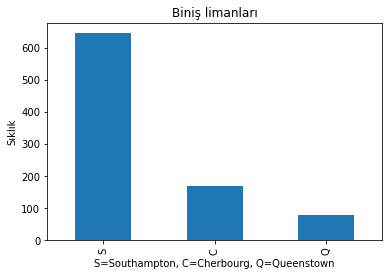

In [110]:
dizi['Embarked'].value_counts().plot(kind='bar')
plt.title('Biniş limanları')
plt.ylabel('Sıklık')
plt.xlabel('S=Southampton, C=Cherbourg, Q=Queenstown')
plt.show()

Hayatta kalma/kalmama durumuna bakıldığında veri setinde yer alan 891 yolcunun 549’u hayatını kaybederken 342’si hayatta kalmıştır.

In [111]:
dizi['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Hayatını kaybeden(0) – hayatta kalan(1) yolcu sayıları çubuk grafik ile gösterilmiştir.

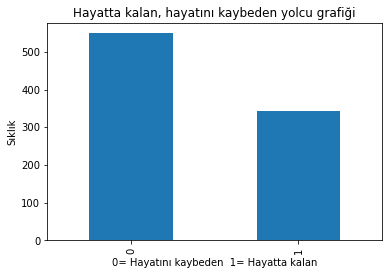

In [112]:
dizi['Survived'].value_counts().plot(kind='bar', title='Hayatta kalan, hayatını kaybeden yolcu grafiği')
plt.xlabel('0= Hayatını kaybeden  1= Hayatta kalan')
plt.ylabel('Sıklık')
plt.show()

Cinsiyete göre hayatını kaybeden(0) ve kurtulan yolcuların(1) sayıları gösterilmiştir.

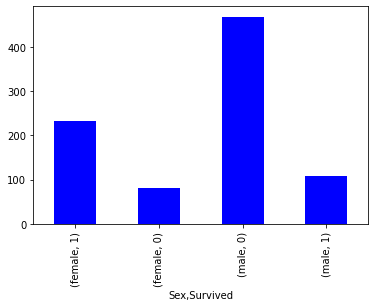

In [113]:
dizi.groupby('Sex')['Survived'].value_counts()
dizi.groupby('Sex')['Survived'].value_counts().plot(kind='bar', stacked=True, colormap='winter')
plt.show()

Yukarıdaki görselin; iki sütuna (‘Sex’, ‘Survived’) .groupby() fonksiyonu ile size() ve unstack() fonksiyonlarının uygulanması sonucunda hayatta kalma (‘Survived’) değişekeninin tek çubuk üzerinde “stacked=True” komutu eklenerek ile daha iyi bir görsele dönüştürülmüştür.

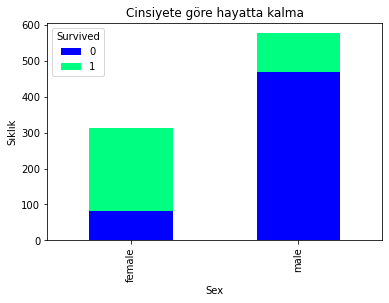

In [114]:
cinsiyetHayattaKalma = dizi.groupby(['Sex', 'Survived'])
cinsiyetHayattaKalma.size().unstack().plot(kind='bar', stacked=True, colormap='winter')
plt.ylabel('Sıklık')
plt.title('Cinsiyete göre hayatta kalma')
plt.show()

Hayatta kalan yetişkin kadın ve yetişkin erkek yolcuların oranı incelenmiştir. Buna göre yetişkin kadın yolcuların %75’i hayatta kalırken, yetişken erkek yolcuların %84’ü hayatını kaybetmiştir.

In [115]:
print ('Hayattta kalan yetişkin kadın yolcuların oranı:', yetiskinKadinYolcular['Survived'].mean())
print ('Hayattta kalan yetişkin erkek yolcuların oranı:', yetiskinErkekYolcular['Survived'].mean())

Hayattta kalan yetişkin kadın yolcuların oranı: 0.752895752895753
Hayattta kalan yetişkin erkek yolcuların oranı: 0.16570327552986513


Yolcu sınıflarına göre hayatta kalan/hayatını kaybeden yolcu sayılarını bulmada size() ve unstack() fonksiyonlarının kullanılmıştır. Öncelikle .groupby() ile ‘Pclass’ ve ‘Survived’ sütunlarını gruplanmıştır.

In [116]:
hayattaKalanlarSinif = dizi.groupby(['Pclass', 'Survived'])

size() ile yolcu sınıflarına göre hayatını kaybeden(0) ve hayatta kalanların(1) sayıları elde edilmiştir.

In [117]:
hayattaKalanlarSinif.size()


Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

unstack() ile elde edilen sonuç daha okunabilir bir formata dönüştürülmüştür.

In [118]:
hayattaKalanlarSinif.size().unstack()

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Yolcu sınıflarına göre hayatını kaybeden(0) ve hayatta kalan(1) yolcu sayıları görselleştirilmiştir.

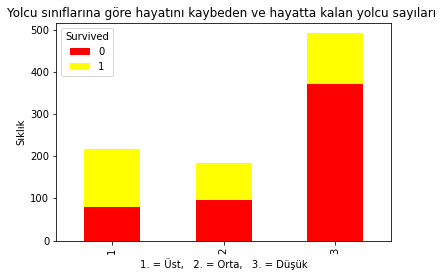

In [119]:
hayattaKalanlarSinif.size().unstack().plot(kind='bar', stacked=True, colormap='autumn')
plt.xlabel('1. = Üst,   2. = Orta,   3. = Düşük')
plt.ylabel('Sıklık')
plt.title('Yolcu sınıflarına göre hayatını kaybeden ve hayatta kalan yolcu sayıları ')
plt.show()

Yolcu sınıflarına göre hayatını kaybeden ve hayatta kalan erkek yolcu sayıları tablosu gösterilmiştir.

In [120]:
print ('Yolcu sınıflarına göre hayatını kaybeden ve hayatta kalan kadın yolcu sayıları tablosu gösterilmiştir.: ',)
kadinYolcular.groupby(['Pclass', 'Survived']).size().unstack()

Yolcu sınıflarına göre hayatını kaybeden ve hayatta kalan kadın yolcu sayıları tablosu gösterilmiştir.: 


Survived,0,1
Pclass,,
1,3,91
2,6,70
3,72,72


In [121]:
print ('Yolcu sınıflarına göre hayatını kaybeden ve hayatta kalan erkek yolcu sayıları tablosu gösterilmiştir.: ',)
erkekYolcular.groupby(['Pclass', 'Survived']).size().unstack()

Yolcu sınıflarına göre hayatını kaybeden ve hayatta kalan erkek yolcu sayıları tablosu gösterilmiştir.: 


Survived,0,1
Pclass,,
1,77,45
2,91,17
3,300,47


Yolcu sınıflarına göre hayatını kaybeden/hayatta kalan erkek ve kadın yolcu sayıları görselleştirilmiştir.

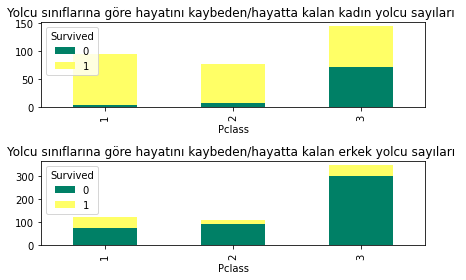

In [122]:
fig, axes = plt.subplots(nrows=2, ncols=1)
kadinYolcular.groupby(['Pclass','Survived']).size().unstack().plot(kind='bar', title='Yolcu sınıflarına göre hayatını kaybeden/hayatta kalan kadın yolcu sayıları ',
                                                                    stacked=True, colormap='summer', ax=axes[0])
erkekYolcular.groupby(['Pclass','Survived']).size().unstack().plot(kind='bar', title='Yolcu sınıflarına göre hayatını kaybeden/hayatta kalan erkek yolcu sayıları ',
                                                                      stacked=True, colormap='summer', ax=axes[1])
plt.tight_layout()
plt.show()

Yalnız yolcuları (yalnizYolcular) gösteren veri çerçevesinin oluşturulmuştur. ‘Yalnız yolcu’dan kasıt, gemide kardeş/eş ve ebeveyn/çocuğu olmayan yolculardır. 
Buna göre ‘SibSp’ ve ‘Parch’ değerlerinin her ikisi de sıfır olan yolcular, oluşturulan “yalnizYolcular” veri çerçevesine dahildir. 
.head() ile, oluşturulan veri çerçevesinin ilk 7 satırının görüntülenmiştir. 

In [123]:
SibSp = dizi[dizi['SibSp'] == 0]
yalnizYolcular = SibSp[SibSp['Parch'] == 0]

Ailesiyle birlikte yolculuk eden yolcuları (ailecekYolcular) gösteren veri çerçevesinin oluşturulmuştur. 
Bu veri çerçevesi, veri setinden (dizi) yalnız yolcuların (yalnizYolcular) çıkarılmasıyla elde edilmiştir. 
Buna göre ‘SibSp’ veya ‘Parch’ değerlerinden herhangi biri sıfırdan büyük bir değere sahip yolcular bu veri çerçevesine (ailecekYolcular) dahildir. 
.tail() ile oluşturulmuştur.

In [124]:
ailecekYolcular= dizi.drop(yalnizYolcular.index[:])

Ödenen bilet ücretlerine göre hayatta kalma oranlarının bulunmuştur. 
Bunun için bilet ücretleri (0’dan 512’ye) büyük farklarla çeşitlilik gösterdiğinden bilet ücreti değerleri eşit aralıklara bölünerek hayatta kalma oranları elde edilmiştir. 
Öncelikle ücret sütununda yer alan boş hücreler ücret (‘Fare’) ortalama değeri ile doldurulmuştur.

In [125]:
dizi['Fare'].fillna(dizi['Fare'].dropna().median(), inplace=True)

.qcut() fonksiyonu ile bilet ücret (‘Fare’) değerleri yolcu sayılarına göre dört eşit gruba ayrılmıştır. 
Buna göre, oluşan ücret bandları (‘FareBand’) “0-7.91”, “7.91-14.454”, “14.454-31”, “31-512.329” olmuştur.

In [126]:
dizi['FareBand'] = pd.qcut(dizi['Fare'], 4)
dizi['FareBand'].value_counts().sort_values(ascending= False)

(7.91, 14.454]     224
(-0.001, 7.91]     223
(14.454, 31.0]     222
(31.0, 512.329]    222
Name: FareBand, dtype: int64

Oluşturulan ücret bandlarına göre hayatta kalma oranları gösterilmiştir. 
Bu sonuca göre yolcular arasında ödenen bilet ücretleri arttıkça hayatta kalma oranları da artmıştır.

In [127]:
dizi[['FareBand', 'Survived']].groupby(['FareBand'],
                          as_index=False).mean().sort_values(by='FareBand',
                          ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081
